In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#load y_test, y_pred
with open('SVR_results.csv', 'rb') as f:
    import csv
    cr = csv.reader(f)
    header = cr.next()
    y_true, y_pred = [], []
    for row in cr:
        y_true.append(float(row[1]))
        y_pred.append(float(row[2]))

In [4]:
#put with original inds
y_true_winds = [(ii, y) for ii,y in enumerate(y_true)]
y_pred_winds = [(ii, y) for ii,y in enumerate(y_pred)]

In [11]:
#sort
y_pred_winds = sorted(y_pred_winds, key = lambda x: -x[1])
y_true_winds = sorted(y_true_winds, key = lambda x: -x[1])

In [114]:
#threshold by percentage
total = len(y_true_winds)
pct_list = [x for x in range(1,100)]
acc_list = []
for pct in pct_list:
    num_in_pct = int(total*pct/float(100))
    #print num_in_pct
    y_true_top = y_true_winds[:num_in_pct]
    y_pred_top = y_pred_winds[:num_in_pct]

    #get list of indices in top %
    top_true_inds = [x[0] for x in y_true_top]
    top_pred_inds = [x[0] for x in y_pred_top]

    #get number of TPs
    combined = top_true_inds + top_pred_inds
    TPs = list(set([x for x in combined if combined.count(x)>1]))
    acc = len(TPs)/float(num_in_pct)
    acc_list.append(100*acc)

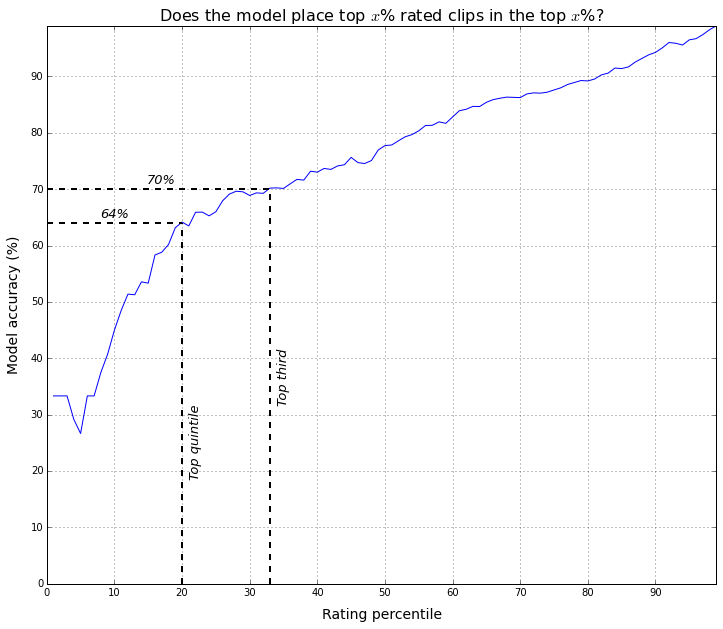

In [171]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(pct_list, acc_list)
ax.set_xlabel('Rating percentile', labelpad=10, fontsize=14)
ax.set_ylabel('Model accuracy (%)', labelpad=10, fontsize=14)
ax.set_yticks(np.arange(0,100,10))
ax.set_yticklabels(np.arange(0,100,10))
ax.set_xticks(np.arange(0,100,10))
ax.set_xticklabels(np.arange(0,100,10))

#draw accuracy line
param_dict = {'color': 'k', 'linewidth': 2, 'linestyle': '--'}
ax.plot([33, 33], [0,70], **param_dict)
ax.plot([0, 33], [70,70], **param_dict)

ax.plot([20, 20], [0,64], **param_dict)
ax.plot([0, 20], [64,64], **param_dict)

#text
text_pd = {'fontsize': 13, 'style': 'italic'}
ax.text(34,40,'Top third', rotation=90, **text_pd)
ax.text(21,30,'Top quintile', rotation=90, **text_pd)
ax.text(15,71,'70%',**text_pd)
ax.text(8,65,'64%',**text_pd)
ax.grid(b=True)

#title
ax.set_title(r'Does the model place top $x$% rated clips in the top $x$%?', fontsize=16)
plt.savefig('/home/lpa8529/Desktop/model_res.png', bbox='tight')